# UNI Machine Learning Course  (MT616)
# Lab 04: Regresión lineal

Los modelos de regresión se utilizan para predecir las variables en espacio continuo, lo que las hace atractivas para
    
*   Entender las relaciones entre variables.
*   Evaluar las tendencias
*   Hacer pronósticos
    
Este Lab tiene 3 partes:

# 1.-  Descenso de Gradiente para una función de una sola variable
En esta parte se construye la funcion de costo y se usa el gradiente descendiente para obtener los valores optimos y se compara rapidamente con [scikit-learn](https://scikit-learn.org/)

https://github.com/PCL-AI/MT616_2018_2/blob/master/Lab02/Lab02a.ipynb

# 2.-  Funciones convexas y no convexas y el descenso de gradiente
En esta parte se muestra la eficacia de las funciones convexas en optimizacion y se usa regresion multivariable y metricas de evalucacion para predecir las ventas de un producto (en miles de unidades) en función de los presupuestos de publicidad (en miles de dólares) para TV, radio y periódicos.

https://github.com/PCL-AI/MT616_2018_2/blob/master/Lab01/Lab01a-MT616.ipynb



# 3.- Case Study: The Boston Housing dataset

La última clase estudiamos Regresión lineal. Hoy definiremos un problema de regresión y aplicaremos el Algoritmo de Regresión Lineal como modelo de predicción.

### Observaciones

*   Los modelos de regresión son básicamente ecuaciones de interpolación en el rango de las variables explicativas. Así que pueden dar malas predicciones si extrapolamos fuera de este rango.
*    Tenga cuidado con los valores atípicos, que pueden cambiar su hiperplano de regresión de forma no deseada.


    

## Supongamos que somos ingenieros consultores en machine learning y nos piden predecir el precio de una casa ubicada en boston de acuerdo a sus atributos.

* Queremos encontrar una función en base a sus atributos de entrada que predigan el precio de la casa como salida.

* ¿Qué atributos contribuyen mas al precio?

* Visualice la relación entre las características y la respuesta usando gráficos de dispersión.

El Housing dataset de UCI repository recopila informacion sobre las casas en los suburbios de Boston. Los siguientes son los atributos:

1.  **CRIM**      Per capita crime rate by town
2.  **ZN**        Proportion of residential land zoned for lots over 25,000 sq.ft.
3.  **INDUS**     Proportion of non-retail business acres per town
4.  **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.  **NOX**       Nitric oxides concentration (parts per 10 million)
6.  **RM**        Average number of rooms per dwelling
7.  **AGE**       Proportion of owner-occupied units built prior to 1940
8.  **DIS**       Weighted distances to five Boston employment centres
9.  **RAD**       Index of accessibility to radial highways
10. **TAX**       Full-value property-tax rate per \$10,000
11. **PTRATIO**   Pupil-teacher ratio by town
12. **B**         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**     % lower status of the population
14. **MEDV**      Median value of owner-occupied homes in $1000's





Hoy vamos a hacer un analysis de regresion

1. Descargar el archivo o leerlo directamente del https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

2. Analisis y visualizacion rapida

3. Entrenar modelo de regresion lineal

4. Mostrar los estimadores/coeficientes aprendidos

5. Evaluación del modelo.


In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import module to calculate model perfomance metrics
import seaborn as sns
from sklearn import metrics

web_data= "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

df = pd.read_csv(web_data,header=None, sep='\s+')

 

df.columns = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

#sns.pairplot(df);
#df.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# use la lista para seleccionar un subconjunto del DataFrame original
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = df[feature_names]
#X = df.iloc[:, :-1].values 
print (X.head())

# salida
y = df.MEDV

# Dividir X e Y en juegos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std = X_train
#X_test_std = X_test

# Modelo
linreg = LinearRegression()

# ajustar el modelo a los datos de entrenamiento 
linreg.fit(X_train_std, y_train)

# Los coeficientes
print('\nCoeficientes:', linreg.coef_)

# hacer predicciones en el conjunto de prueba

y_train_pred = linreg.predict(X_train_std)

y_pred = linreg.predict(X_test_std)




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
#Training data points: 404
#Testing data points: 102

Coeficientes: [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


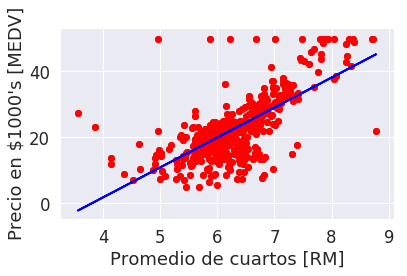

In [0]:
# Ploteo en 2D de un solo atributo
sc.fit(X_train)
X_train_std = sc.transform(X_train)

plt.scatter(df['RM'], y, c='red')

X_rm = df['RM'].values[:, np.newaxis]
y = df['MEDV'].values


# fit 
linreg.fit(X_rm, y)

y_pred_1D = linreg.predict(X_rm)


plt.scatter(df['RM'], y, c='red')
plt.plot(X_rm, linreg.predict(X_rm), color='blue', linewidth=2)
    
plt.xlabel('Promedio de cuartos [RM]')
plt.ylabel('Precio en $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

## Métricas de evaluación del modelo para la regresión

Si tenemos multiples variables explicativas, no podemos visualizar el hiperplano de regresión lineal en un gráfico bidimensional. En este caso, necesitamos otras formas de evaluar el modelo entrenado. Por ejemplo la regresión lineal multivariable necesita métricas de evaluación diseñadas para comparar valores continuos. Aqui evaluemos los resultados utilizando el error de la media al cuadrado (MSE) y el coeficiente de determinación (R2):


$$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i -\hat{y}_i)^2$$

$$R^2 =  1− Relative~Squared~Error(RSE) = \dfrac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^2}$$

El Root Mean Squared Error (https://en.wikipedia.org/wiki/Root-mean-square_deviation) es la raíz cuadrada de la media de los errores al cuadrado (MSE). 

In [0]:
# calcular el RMSE de nuestras predicciones
print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))


# Explicación de R^2: 1 es predicción perfecta
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))


MSE train: 19.33, test: 33.45
R^2 train: 0.77, test: 0.59


Un valor normal  de $R^2$ debería estar entre $0$ y $1$, y cuanto más alto sea $R^2$, mejor. En la práctica, a menudo consideramos que $R^2>0.8$ es bueno. si $R^2$ es negativo, significa que el modelo no se ajusta bien a los datos.


## Gráfico residual

Es un análisis gráfico comúnmente utilizado para un modelo de regresión para detectar la no linealidad y los valores atípicos y tiene las siguientes caracteristicas:

*   En el caso de una predicción perfecta, los residuos serían exactamente cero. Para un buen modelo de regresión, esperaramos que los errores se distribuyan aleatoriamente y los residuos se dispersen aleatoriamente alrededor de la línea central. 
*  Si vemos patrones en un gráfico de residuos, significa que nuestro modelo no puede capturar cierta información explicativa, que se filtra en los residuos. 
* Estos gráficos residuales son usados para detectar valores atípicos, que están representados por puntos con una gran desviación de la línea central.

https://en.wikipedia.org/wiki/Partial_residual_plot



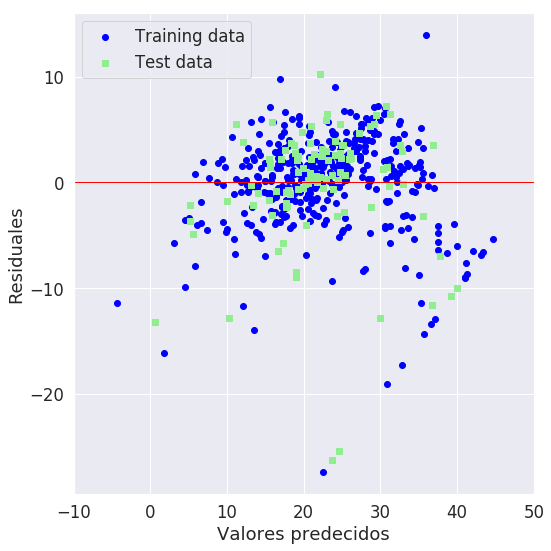

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(y_train_pred,y_train_pred - y_train,c='blue',marker='o',label='Training data')
plt.scatter(y_pred,y_pred - y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Valores predecidos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=1, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()



## Matriz de correlación

Mostrar las distribuciones de unión en pares puede ser abrumador cuando tenemos muchas variables los datos. A veces, podemos trazar la matriz de correlación para cuantificar la relación lineal entre variables. El coeficiente de correlación entre dos variables aleatorias $a$ y $b$ se definen como:

$$\frac{\mathrm{Cov}(\mathrm{a},\mathrm{b})}{\sqrt{\mathrm{Var}(\mathrm{a})\mathrm{Var}(\mathrm{b})}}$$


La varianza "normalizada" es la que captura la relación lineal de dos variables aleatorias, y los valores están limitados al rango $[-1,1]$. La matriz de correlación $\boldsymbol{R}\in\mathbb{R}^{D\times D}$ de un vector aleatorio $x$ es una matriz cuadrada cuyo elemento $R_{i, j}$ denota la correlación entre los atributos $x_i$ y $x_j$. Si consideramos los puntos de datos como i.i.d. muestras de x, entonces podemos tener un estimado $$\hat{\boldsymbol{R}} cuyo elemento

$$\hat{R}_{i,j}=\frac{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})}{\sqrt{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})^{2}}\sqrt{\Sigma_{s=1}^{N}(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})^{2}}}=\frac{\hat{\sigma}_{\mathrm{x}_{i},\mathrm{x}_{j}}}{\hat{\sigma}_{\mathrm{x}_{i}}\hat{\sigma}_{\mathrm{x}_{j}}}$$

es una estimación de la correlación (generalmente llamada r de Pearson) entre los atributos $x_i$ y $x_j$.  Ademas normalizamos $z$ para cada punto de los datos tal que

$$z_{i}^{(s)}=\frac{x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}}}{\hat{\sigma}_{\mathrm{x}_{i}}}$$

para todo $i$. Entonces simplemente tenemos $\hat{\boldsymbol{R}}=\frac{1}{N}\boldsymbol{Z}^\top \boldsymbol{Z}$, donde $Z$ es la matriz de diseño de los puntos de datos normalizados. Podemos trazar $\hat{\boldsymbol{R}}$ de la siguiente manera:

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


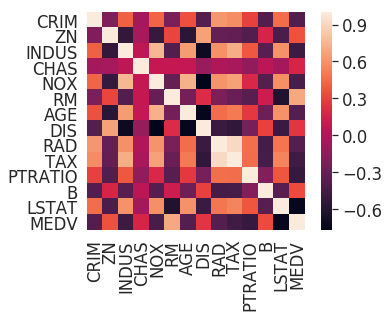

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(df)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.5)

ticklabels = [s for s in df.columns]

hm = sns.heatmap(R,cbar=True,square=True,yticklabels=ticklabels,xticklabels=ticklabels)

plt.show()


La matriz de correlación ofrece una visión más concisa de la relación entre variables. La regresión lineal, suponen que las variables están correlacionadas linealmente con la variable objetivo. Un mapa de calor de correlaciones puede ayudarnos a seleccionar variables que respalden esta suposición. 

# Exam 1: Contaminación ambiental por partículas (Particulate pollution)
##Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating



La contaminación de partículas, también llamada particulate matter (PM), es una mezcla de sólidos y gotas de líquido que flotan en el aire. PM2.5 se refiere a particulas que tiene un diámetro menor que 2.5 micrómetros y que es aproximadamente el 3% del diámetro de un cabello humano. Las partículas menores o iguales a 10 micrómetros de diámetro son tan pequeñas que pueden ingresar a los pulmones, lo que podría causar serios problemas de salud. Las lecturas de PM2.5  se incluyen en los informes de calidad del aire de las autoridades ambientales y las empresas. [link](https://blissair.com/what-is-pm-2-5.htm) 

En la Figura se muestra la comparacion del diametro con el cabello y la tabla te dara una idea de que niveles de PM2.5 son perjudiciales y las precauciones. La cual se basa en los estándares de calidad del aire para la contaminación de partículas publicados por la [EPA](https://www.epa.gov/).


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
display(HTML("<table><tr><td><img src='https://blissair.com/wp-content/uploads/2013/06/pm25_comparison.jpg'></td><td><img src='https://2.bp.blogspot.com/-JrOWaLyMpGQ/Wvk4x61tCvI/AAAAAAAAARQ/j89n5Q8QjGcnpD8oXnLzgSlmER1ovReIQCLcBGAs/s1600/4.png'></td></tr></table>"))

,


## El dataset
En esta tarea, debe entrenar los modelos de regresión en el set de datos de [Beijing PM2.5](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#).

 Este conjunto de datos por hora contiene los datos de PM2.5 de la Embajada de EE. UU. En Beijing. También se incluyen los datos meteorológicos del Aeropuerto Internacional de Pekín.

*  **No**: row number
*  ** year**: year of data in this row
*  ** month**: month of data in this row
*   **day**: day of data in this row
*   **hour**: hour of data in this row
*   **pm2.5**: PM2.5 concentration (ug/m^3)
*   **DEWP**: Dew Point (â„ƒ)
*   **TEMP**: Temperature (â„ƒ)
*   **PRES**: Pressure (hPa)
*   **cbwd**: Combined wind direction
*   **Iws**: Cumulated wind speed (m/s)
*   **Is**: Cumulated hours of snow
*   **Ir**: Cumulated hours of rain 


     
     

## Pregunta  : ¿Cual de los atributos mejora la calidad de nuestras predicciones?
**Hipótesis :** el **cbwd**  no mejora las predicciones del modelo. **Prueba de hipótesis**: Que hacemos para mejorar el error.
      
## Para escojer el mejor modelo:

1.  Hacer un analisis inicial de jerarquias en los datos para subdividirlos.
2.  Puedes eliminar las filas con **NA** (mas adelante vamos a aprender tecnicas para manejar este tipo de valores)
3.  Debes categorizar el atributo **cbwd** o justificar su eliminacion
4.  Selecciar las características aleatoriamente, forward, backward
5.  Implementar regresores lineales (polinomios) escojiendo los atributos con almenos dos tecnicas mostradas en clase.
6.  Mostrar un gráfico residual para cada uno de los modelos tanto en los datos de entrenamiento como en los datos de prueba. 
7.  El puntaje de $R^2$ debe ser mayor que $0.7$ en los datos de prueba para tu modelo final.

##Tip: 
El error es algo que queremos minimizar, por lo que un número menor para MSE es mejor. Si quisiéramos realizar cambios y mejoras el modelo, el MSE debería ser menor si el modelo está mejorando.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv', sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
## Escribir codigo
##